<h1>Linear Regression</h1>

In [79]:
# Importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
house = pd.read_csv('D:/Study/DataScience/Data/MachineLearningData/home_data.csv')

In [3]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [5]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

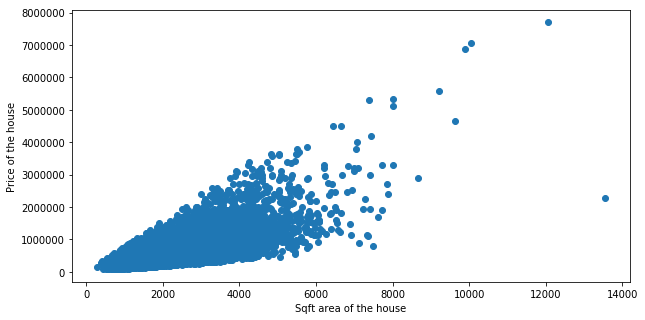

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(house['sqft_living'], house['price'])
plt.xlabel('Sqft area of the house')
plt.ylabel('Price of the house')
plt.show()

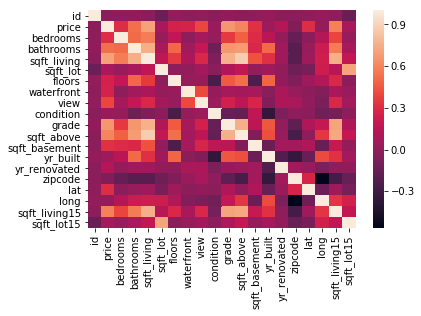

In [16]:
sns.heatmap(house.corr())

In [17]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
# Define independent and target variables
x = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
          'floors', 'sqft_above',  'sqft_lot15','yr_built','condition','zipcode']]

y = house['price']

In [27]:
# Split the data into training and testing datasets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [35]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

y_predict = lr_model.predict(x_test)

In [32]:
# Model Coefficents

print('The model coeeficients are:',lr_model.coef_)
print('\n')
print('The model intercept is: ',lr_model.intercept_)

The model coeeficients are: [-6.36431367e+04  6.13044681e+04  2.93923516e+02  7.10011123e-02
  5.29849179e+04  1.04646653e+01 -6.21025413e-01 -2.99732502e+03
  2.29674520e+04  1.84689659e+02]


The model intercept is:  -12361625.60826452


In [33]:
# Viewing coeffients in a pandas dataframe

model_coeff = pd.DataFrame(lr_model.coef_, x.columns, columns=['Coefficient Values'])

model_coeff

,Coefficient Values
bedrooms,-63643.136705
bathrooms,61304.468085
sqft_living,293.923516
sqft_lot,0.071001
floors,52984.917854
sqft_above,10.464665
sqft_lot15,-0.621025
yr_built,-2997.325016
condition,22967.451967
zipcode,184.689659


In [37]:
# Checking the accuracy of the model

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)

rmse = np.sqrt(mse)

rmse

246353.87976535707

In [38]:
# Create a model using 14-15 variables or features

x2 = house[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15']]

y2 = house['price']

In [42]:
# Split the datasets into training and testing datasets

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state = 0)

In [43]:
# Train the linear regression model

lr2_model = LinearRegression()

lr2_model.fit(x2_train, y2_train)

y2_predict = lr2_model.predict(x2_test)

In [44]:
# Evaluate the model

mse2 = mean_squared_error(y2_test, y2_predict)

rmse2 = np.sqrt(mse2)

print(rmse)

246353.87976535707


<h1> Linear Regression with Lending Data </h1>

In [45]:
lending_data = pd.read_csv('D:/Study/DataScience/Data/MachineLearningData/loansDataaws.csv')

In [46]:
lending_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


<b> Data pre-processing </b>

In [78]:
lending_data['Interest.Rate1'] = lending_data['Interest.Rate'].str.extract('([^%\b]+)', expand=False).str.strip()

In [84]:
lending_data['Loan.Length1'] = lending_data['Loan.Length'].str.extract('([^ months\b]+)', expand=False).str.strip()

In [90]:
lending_data['Debt.To.Income.Ratio1'] = lending_data['Debt.To.Income.Ratio'].str.extract('([^%\b]+)', expand=False).str.strip()

In [98]:
lending_data[['FICO.Range1', 'FICO.Range2'] ] = lending_data["FICO.Range"].str.split("-", n = 1, expand = True) 

In [105]:
lending_data['FICO.Range_new'] = (lending_data['FICO.Range1'].astype('float32') +lending_data['FICO.Range2'].astype('float32'))/2

In [106]:
lending_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Interest.Rate1,Loan.Length1,Debt.To.Income.Ratio1,FICO.Range1,FICO.Range2,FICO.Range_new
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,8.90,36,14.90,735,739,737.0
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,12.12,36,28.36,715,719,717.0
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,21.98,60,23.81,690,694,692.0
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,9.99,36,14.30,695,699,697.0
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,11.71,36,18.78,695,699,697.0


In [89]:
lending_data['Home.Ownership'].value_counts()

MORTGAGE    1148
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

In [112]:
lending_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 81174 to 3116
Data columns (total 14 columns):
Amount.Requested                  2500 non-null int64
Amount.Funded.By.Investors        2500 non-null float64
Loan.Purpose                      2500 non-null object
State                             2500 non-null object
Home.Ownership                    2500 non-null object
Monthly.Income                    2499 non-null float64
Open.CREDIT.Lines                 2498 non-null float64
Revolving.CREDIT.Balance          2498 non-null float64
Inquiries.in.the.Last.6.Months    2498 non-null float64
Employment.Length                 2423 non-null object
Interest.Rate                     2500 non-null object
Loan.Length                       2500 non-null object
Debt.To.Income.Ratio              2500 non-null object
FICO.Range                        2500 non-null float32
dtypes: float32(1), float64(5), int64(1), object(7)
memory usage: 283.2+ KB


In [109]:
lending_data.drop(['Loan.Length','FICO.Range' ,'FICO.Range1', 'FICO.Range2', 'Debt.To.Income.Ratio', 'Interest.Rate' ], axis=1 , inplace=True)

In [111]:
lending_data.rename(columns={"Interest.Rate1": "Interest.Rate",
                             "Loan.Length1": "Loan.Length",
                              "Debt.To.Income.Ratio1" : "Debt.To.Income.Ratio",
                              "FICO.Range_new" : "FICO.Range"}, inplace= True)

In [113]:
dframe = pd.read_csv('D:/Study/DataScience/Data/MachineLearningData/loan.csv')

In [126]:
dframe.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


In [136]:
dframe.fillna(dframe.mean(), inplace=True)

In [137]:
dframe.isna().sum()

Interest.Rate     0
FICO.Score        0
Loan.Length       0
Monthly.Income    0
Loan.Amount       0
dtype: int64

<b> Linear Regression using clean data </b>

In [138]:
a = dframe.iloc[:, 1:].values
b = dframe.iloc[:,0:1].values

In [139]:
# Split the dataframe into traning and testing datasets

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3, random_state = 0)

In [140]:
lr_loan = LinearRegression()

lr_loan.fit(a_train, b_train)

b_predict = lr_loan.predict(a_test)

In [144]:
# Model Accuracy

mse_loan = mean_squared_error(b_test, b_predict)

rmse_loan = np.sqrt(mse_loan)

rmse_loan

2.0962199475961967